In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from mlxtend.feature_selection import ColumnSelector
from sklearn.feature_selection import chi2

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve


In [12]:
pwd

'C:\\Users\\david\\Documents\\Flatiron\\Phase5\\Capstone\\MediaBiasAnalysis\\Notebooks'

In [89]:
X_train = pd.read_pickle("../data/X_train.pkl")
X_train.head()

,processed_content
53181,moving truck spotted parked outside white hous...
68991,saturday msnbc nbc host chuck todd reacted lew...
60555,tuesday broadcast situation room senator rober...
13536,since sexual assault allegation supreme court ...
66435,jason brian dalton arrested early sunday morni...


In [90]:
X_val = pd.read_pickle("../data/X_val.pkl")
X_val.head()

,processed_content
16585,former cricket star turned politician imran kh...
80123,testimony house science committee wednesday mi...
48801,bottom line front judgment former national sec...
9141,fury tropical cyclone pam one powerful storm e...
39116,legislator thing campaigned voter turn back pi...


In [78]:
y_train = pd.read_pickle("../data/y_train.pkl")
y_train.head()

53181    0
68991    1
60555    1
13536   -1
66435    1
Name: Bias, dtype: int64

In [79]:
y_val= pd.read_pickle("../data/y_val.pkl")
y_val.head()

16585   -1
80123    1
48801    0
9141    -1
39116    0
Name: Bias, dtype: int64

# Vectorize

In [17]:
cv= CountVectorizer(max_features=2000)
cv.fit(X_train["processed_content"])
X_train_cv = cv.transform(X_train["processed_content"])
X_train_cv

<57621x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 9062006 stored elements in Compressed Sparse Row format>

In [18]:
X_train_cv = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names(), 
                              index=X_train.index)
X_train_cv

,abc,ability,able,abortion,absolutely,abuse,accept,access,according,account,...,wrong,wrote,yeah,year,yes,yet,york,young,youtube,zika
53181,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
68991,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
60555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13536,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,2,0,0
66435,0,0,1,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49146,0,1,0,0,0,2,0,0,0,0,...,0,0,0,4,1,0,0,0,0,0
66414,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0
44131,0,0,0,0,0,2,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
58058,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
X_val_cv = cv.transform(X_val["processed_content"])

In [41]:
dic_vocabulary = cv.vocabulary_

In [42]:
dic_vocabulary

{'moving': 1147,
 'truck': 1850,
 'outside': 1241,
 'white': 1954,
 'house': 852,
 'wednesday': 1944,
 'sign': 1631,
 'president': 1346,
 'obama': 1200,
 'two': 1871,
 'week': 1945,
 'elect': 574,
 'donald': 537,
 'trumpdonald': 1854,
 'john': 948,
 'trumppossible': 1855,
 'gop': 780,
 'challenger': 299,
 'say': 1554,
 'trump': 1853,
 'deserve': 499,
 'reelection': 1453,
 'would': 1984,
 'vote': 1919,
 'democrat': 493,
 'rourke': 1534,
 'driving': 548,
 'global': 770,
 'economy': 564,
 'recession': 1448,
 'manchin': 1067,
 'golden': 775,
 'opportunity': 1228,
 'gun': 800,
 'reform': 1455,
 'move': 1143,
 'day': 468,
 'time': 1813,
 'pic': 1294,
 'twitter': 1870,
 'com': 352,
 'reporter': 1486,
 'inc': 876,
 'west': 1950,
 'executive': 628,
 'behind': 187,
 'office': 1209,
 'building': 247,
 'wing': 1963,
 'washington': 1936,
 'reported': 1484,
 'family': 661,
 'neighborhood': 1173,
 'stay': 1700,
 'least': 1008,
 'high': 830,
 'school': 1561,
 'husband': 859,
 'living': 1035,
 'block':

In [190]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),lowercase=False)

In [67]:
articles = X_train["processed_content"]
vectorizer.fit(articles)

X_train = vectorizer.transform(articles)
X_val = vectorizer.transform(articles)

dic_vocabulary = vectorizer.vocabulary_

In [76]:
X_train_tf_vec_df = pd.DataFrame(X_train_tf_vec.toarray(), columns=tfidf_vectorizer.get_feature_names())
X_val_tf_vec_df = pd.DataFrame(X_val_tf_vec.toarray(), columns=tfidf_vectorizer.get_feature_names())

X_train_tf_vec_df.shape

(57621, 2000)

## Modeless Predictions

In [23]:
y_train.value_counts(normalize= True)

 1    0.348189
-1    0.328769
 0    0.323042
Name: Bias, dtype: float64

## Baseline Model

### Logitsic Regression

In [169]:
seed = 42

In [172]:
lr = LogisticRegression(random_state=seed, multi_class="auto")
lr.fit(X_train_tf_vec_df, y_train)
print(lr.score(X_train_tf_vec_df, y_train))
print(lr.score(X_val_tf_vec_df, y_val))

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9300081567484076
0.916332587077628


In [191]:
lr_tuned = Pipeline(steps=[
    ("tf", vectorizer),
    ("clf", LogisticRegression(random_state=seed))
])
lr_tuned

Pipeline(steps=[('tf', TfidfVectorizer(lowercase=False, ngram_range=(1, 2))),
                ('clf', LogisticRegression(random_state=42))])

In [192]:
param_grid = {
    'clf__penalty': ["l2"],
    'clf__max_iter': [1000],
    'clf__C': [1],
    'clf__solver': ['newton-cg'],
}

In [193]:
grid = GridSearchCV(lr_tuned, param_grid, return_train_score=True)

In [196]:
output = grid.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1678, 57621]

In [179]:
output.best_params_

{'clf__C': 1,
 'clf__max_iter': 1000,
 'clf__penalty': 'l2',
 'clf__solver': 'newton-cg'}

In [180]:
def evaluate(estimator, X_tr, X_te, y_tr, y_te, roc_auc='skip'):
    '''
    orginial function at : 
    (https://github.com/lindseyberlin/Cat-in-the-Dat-Project/blob/main/notebooks/Lindsey/EDA-Initial-Models.ipynb)
    Evaluation function to show a few scores for both the train and test set
    Also shows a confusion matrix for the test set
    
    roc_auc allows you to set how to calculate the roc_auc score: 
    'dec' for decision_function or 'proba' for predict_proba 
    If roc_auc == 'skip', then it ignores calculating the roc_auc_score
    
    Inputs:
        estimator: a fit sklearn-style model or pipeline
        X_tr: array or pandas dataframe
            training input variables
        X_te: array or pandas dataframe
            testing input variables
        y_tr: array or pandas series
            training output variable
        y_te: array or pandas series
            testing output variable
        roc_auc: str
            'skip': default, skips calculating roc_auc
            'dec': use decision_function to calculate roc_auc
            'proba': use predict_proba to calculate roc_auc
            
    '''
    # Grab predictions
    tr_preds = estimator.predict(X_tr)
    te_preds = estimator.predict(X_te)
    
    # output needed for roc_auc_score
    if roc_auc == 'skip': # skips calculating the roc_auc_score
        train_out = False
        test_out = False
    elif roc_auc == 'dec': 
        train_out = estimator.decision_function(X_train)
        test_out = estimator.decision_function(X_test)
    elif roc_auc == 'proba': 
        train_out = estimator.predict_proba(X_train)[:, 1] # proba for the 1 class
        test_out = estimator.predict_proba(X_test)[:, 1]
    else:
        raise Exception("The value for roc_auc should be 'skip', 'dec' or 'proba'")    
    
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train Precision: {precision_score(y_tr, tr_preds)}")
    print(f"Train Recall: {recall_score(y_tr, tr_preds)}")
    print(f"Train F1-Score: {f1_score(y_tr, tr_preds)}")
    if type(train_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_train, train_out)}")
        
    print("*" * 10)
    print("Testing Scores:")
    print(f"Test Accuracy: {accuracy_score(y_te, te_preds)}")
    print(f"Test Precision: {precision_score(y_te, te_preds)}")
    print(f"Test Recall: {recall_score(y_te, te_preds)}")
    print(f"Test F1-Score: {f1_score(y_te, te_preds)}")
    if type(test_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")    
    
    # Plot confusion matrix for test set
    plot_confusion_matrix(estimator, X_te, y_te, values_format='.5g', cmap=plt.cm.Oranges)

In [181]:
evaluate(output.best_estimator_, X_train, X_val, y_train, y_val, roc_auc='proba')

ValueError: could not convert string to float: 'former cricket star turned politician imran khan declared party winner pakistan national election result official yet though dozen rival candidate saying election rigged khan pti party reportedly backed country powerful military accused intimidating candidate competing party censoring major news outlet election took place july also marred violence several attack killed hundred campaign rally week leading election day bombing near polling station wednesday left people dead thursday morning several network reported khan party leading poll substantial margin expected win majority pakistan lower house national assembly whichever party win majority assembly form government appoint prime minister vote count started pour incumbent pml party strongly objected result clear rigging accept result shahbaz sharif said press conference northeastern city lahore thursday tolerate people use everything power regain right election commission pakistan already dismissed election meddling allegation false conspiracy election commission secretary babar yaqoob told reporter since pakistan independence country armed force staged multiple coup successfully overthrow government analyst believe likely hand directing outcome election well trying intimidate people nawaz sharif party particular try switch either imran khan party declare candidacy independent madiha afzal nonresident fellow brookings institution told military denied claim armed force spokesperson called interference allegation malicious propaganda twitter series attack leading election left hundred dead pakistani citizen called heightened security measure election day military deployed soldier help guard election people think necessary precaution others saw way country armed force assert control also widely believed military responsible ousting last prime minister nawaz sharif brother shahbaz sharif previously leader pml party nawaz sharif often feuded armed force ultimately disqualified office pakistan supreme court corruption allegation july use political legal option redressal glaring excess outright rigging result based massive rigging cause irreparable damage country sharif tweeted'

In [80]:
# Instantiate a MultinomialNB classifier
classifier = MultinomialNB()

# Evaluate the classifier on X_train_vectorized and y_train
baseline_cv = cross_val_score(classifier, X_train_tf_vec_df, y_train)
baseline_cv

array([0.79427332, 0.77481777, 0.78800764, 0.78783409, 0.79234641])

In [167]:
model = Pipeline(steps=[
    ("tfidf", vectorizer),
    ("clf", classifier)])
accuracy = cross_val_score(model, X_train["processed_content"], y_train, cv=5, scoring='accuracy')
precision = cross_val_score(model, X_train["processed_content"], y_train, cv=5, scoring='precision_micro')
recall = cross_val_score(model, X_train["processed_content"], y_train, cv=5, scoring='recall_micro')
f1 = cross_val_score(model, X_train["processed_content"], y_train, cv=5, scoring='f1_micro')
print('accuray',  accuracy)
print('precision' , precision)
print('recall' ,recall)
print('F1-Score' , f1)

IndexError: Index dimension must be <= 2

In [162]:
param_grid = {
    "tfidf__max_df" : [.99, .95, .90],
    "tfidf__min_df" : [.01, .005,.001],
    "tfidf__max_features" : [2000, 100, 500],
    'clf__alpha': [.1, 1e-2, 1e-3]
}

In [165]:
grid = GridSearchCV(model, param_grid, return_train_score=True)

In [166]:
output = grid.fit(X_train, y_train)

ValueError: Invalid parameter clf for estimator Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=2000, ngram_range=(1, 2))),
                ('classifier', MultinomialNB())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
output.best_params_

In [116]:
def fit_bow(corpus, vectorizer=None, vocabulary=None):
    ## vectorizer
    vectorizer = feature_extraction.text.TfidfVectorizer(max_features=None, ngram_range=(1,1), vocabulary=vocabulary) if vectorizer is None else vectorizer
    vectorizer.fit(corpus)
    
    ## sparse matrix
    print("--- creating sparse matrix ---")
    X = vectorizer.transform(corpus)
    print("shape:", X.shape)
    
    ## vocabulary
    print("--- creating vocabulary ---") if vocabulary is None else print("--- used vocabulary ---")
    dic_vocabulary = vectorizer.vocabulary_   #{word:idx for idx, word in enumerate(vectorizer.get_feature_names())}
    print(len(dic_vocabulary), "words")
    
    ## text2tokens
    print("--- tokenization ---")
    tokenizer = vectorizer.build_tokenizer()
    preprocessor = vectorizer.build_preprocessor()
    lst_text2tokens = []
    for text in corpus:
        lst_tokens = [dic_vocabulary[word] for word in tokenizer(preprocessor(text)) if word in dic_vocabulary]
        lst_text2tokens.append(lst_tokens)
    print(len(lst_text2tokens), "texts")
    
    ## plot heatmap
    fig, ax = plt.subplots(figsize=(15,5))
    sns.heatmap(X.todense()[:,np.random.randint(0,X.shape[1],100)]==0, vmin=0, vmax=1, cbar=False, ax=ax).set_title('Sparse Matrix Sample')
    plt.show()
    return {"X":X, "lst_text2tokens":lst_text2tokens, "vectorizer":vectorizer, "dic_vocabulary":dic_vocabulary, "X_names":vectorizer.get_feature_names()}

--- creating sparse matrix ---
shape: (57621, 2000)
--- creating vocabulary ---
2000 words
--- tokenization ---
57621 texts


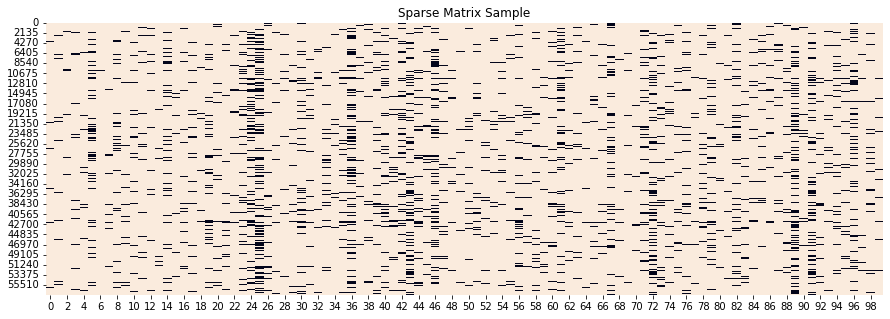

In [121]:
dic_bow = fit_bow(corpus=X_train["processed_content"], vectorizer=vectorizer, vocabulary=None)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [124]:
def fit_ml_classif(X_train, y_train, X_test, vectorizer=None, classifier=None): 
    ## model pipeline
    vectorizer = feature_extraction.text.TfidfVectorizer() if vectorizer is None else vectorizer
    classifier = naive_bayes.MultinomialNB() if classifier is None else classifier
    model = Pipeline([("vectorizer",vectorizer), ("classifier",classifier)])
    
    ## train
    if vectorizer is None:
        model.fit(X_train, y_train)
    else:
        model["classifier"].fit(X_train, y_train)
    
    ## test
    predicted = model.predict(X_test)
    predicted_prob = model.predict_proba(X_test)
    return model, predicted_prob, predicted

In [146]:
X_val = X_val["processed_content"].values

In [147]:
model, predicted_prob, predicted = fit_ml_classif(X_train, y_train, X_val, vectorizer, classifier)

In [148]:
def evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5)):
    classes = np.unique(y_test)
    y_test_array = pd.get_dummies(y_val, drop_first=False).values
    
    ## Accuracy, Precision, Recall
    accuracy = accuracy_score(y_val, predicted)
    auc = roc_auc_score(y_val, predicted_prob, multi_class="ovr")
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(classification_report(y_val, predicted))
    
    ## Plot confusion matrix
    cm = confusion_matrix(y_val, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i], predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(fpr, tpr)))
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)
    
    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = precision_recall_curve(y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(recall, precision)))
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.show()

Accuracy: 0.79
Auc: 0.92
Detail:
              precision    recall  f1-score   support

          -1       0.73      0.70      0.72      6234
           0       0.93      0.86      0.90      6158
           1       0.72      0.80      0.76      6815

    accuracy                           0.79     19207
   macro avg       0.80      0.79      0.79     19207
weighted avg       0.79      0.79      0.79     19207



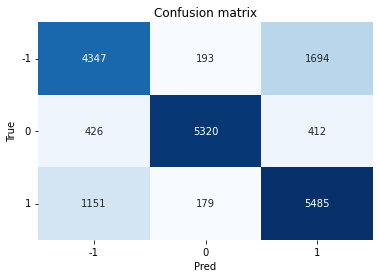

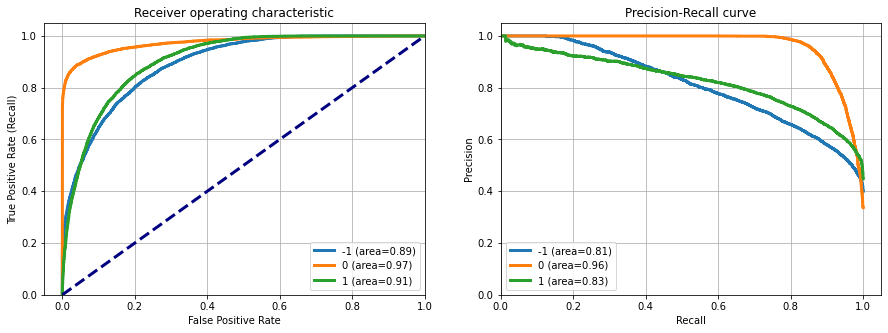

In [153]:
evaluate_multi_classif(y_val, predicted, predicted_prob, figsize=(15,5))